Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

Example Tutorial for Australian Domestic Tourism
[1] https://nixtlaverse.nixtla.io/hierarchicalforecast/examples/australiandomestictourism.html


For Non-Negative Reconcilitation.
[3] https://nixtlaverse.nixtla.io/hierarchicalforecast/examples/nonnegativereconciliation.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import darts
from darts import TimeSeries
from darts.utils.missing_values import fill_missing_values
from darts.models.forecasting.arima import ARIMA
from darts.utils.statistics import check_seasonality, extract_trend_and_seasonality, plot_acf

import numpy as np
import pandas as pd
from darts import TimeSeries
from darts.models import ExponentialSmoothing, NaiveSeasonal
from darts.utils.utils import ModelMode
from darts.dataprocessing.transformers import Scaler

import numpy as np
import pandas as pd


import os
from pathlib import Path

from darts.models.forecasting.linear_regression_model import LinearRegressionModel
import matplotlib.pyplot as plt
from darts.metrics.metrics import mae
import numpy as np
import pandas as pd
from darts.dataprocessing.transformers.reconciliation import MinTReconciliator


pd.set_option('display.max_columns', 500)


Support for Torch based models not available. To enable them, install "darts", "u8darts[torch]" or "u8darts[all]" (with pip); or "u8darts-torch" or "u8darts-all" (with conda).
/home/user/virtualenvs/lh_desafio_ds_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from data_processing import resample_time_series, fill_timeseries_gaps


In [3]:
curr_folder_path = Path(os.path.abspath(""))
base_path = curr_folder_path.parent.absolute()
data_path = os.path.join(base_path, 'data')

df_ds1 = pd.read_csv(os.path.join(data_path, 'dim_ds_new.csv'))

df_ds1.sample(3)

,SALES_ORDER_ID,ACCOUNT_NUMBER,BILL_TO_ADDRESS_ID,CREDITCARD_ID,CUSTOMER_ID,CURRENCY_RATE_ID,DUE_DATE,FREIGHT,ONLINE_ORDER_FLAG,ORDER_DATE,SALES_PERSON_ID,SHIP_DATE,SHIP_TO_ADDRESS_ID,SHIP_METHOD_ID,SALES_STATUS,SUBTOTAL,TERRITORY_ID,TAXAMT,TOTAL_DUE,PRODUCT_ID,SALES_ORDER_DETAIL_ID,ORDER_QTY,SPECIAL_OFFER_ID,UNIT_PRICE,UNIT_PRICE_DISCOUNT,PRODUCT_CLASS,PRODUCT_COLOR,DAY_TO_MANUFACTURE,FINISHED_GOODS_FLAG,LIST_PRICE,PRODUCT_NAME,PRODUCT_LINE,PRODUCT_MODEL_ID,PRODUCT_NUMBER,PRODUCT_SUBCATEGORY_ID,SELL_END_DATE,SELL_START_DATE,PRODUCT_SIZE,SIZE_UNIT_MEASURE_CODE,STANDARD_COST,PRODUCT_STYLE,PRODUCT_WEIGHT,WEIGHT_UNIT_MEASURE_CODE,PERSON_ID,STORE_ID,BUSINESS_ENTITY_ID,STORE_NAME,TERRITORY_NAME,COUNTRY_REGION_CODE,TERRITORY_GROUP,SALES_YTD,SALES_LAST_YEAR,COST_YTD,COST_LAST_YEAR,STATEPROVINCE_ID,STATEPROVINCE_NAME,STATEPROVINCE_CODE,COUNTRYREGION_CODE,IS_PROVINCE_FLAG,COUNTRY_REGION_NAME,ADDRESS_ID,ADDRESSLINE_FULL,CITY,POSTALCODE
23165,67679,10-4030-024562,24691,18927.0,24562,NaN,2014-03-17 00:00:00.000,0.0998,True,2014-03-05,NaN,2014-03-12,24691,1,5,3.9900,8,0.3192,4.4090,922,97926,1,1,3.9900,0.0,NaN,NaN,0,True,3.99,Road Tire Tube,R,93,TT-R982,37,NaN,2013-05-30 00:00:00.000,NaN,NaN,1.4923,NaN,NaN,NaN,15616,NaN,NaN,NaN,Germany,DE,group,3.805202e+06,1.307950e+06,0,0,20,Hamburg,HH,DE,False,Germany,24691,"Welt Platz 123, Welt Platz 123",Hamburg,20354
43550,70011,10-4030-025508,18272,462.0,25508,NaN,2014-04-17 00:00:00.000,13.4998,True,2014-04-05,NaN,2014-04-12,18272,1,5,539.9900,8,43.1992,596.6890,999,106154,1,1,539.9900,0.0,L,Black,4,True,539.99,"Road-750 Black, 52",R,31,BK-R19B-52,2,NaN,2013-05-30 00:00:00.000,52,CM,343.6496,U,20.42,LB,9219,NaN,NaN,NaN,Germany,DE,group,3.805202e+06,1.307950e+06,0,0,20,Hamburg,HH,DE,False,Germany,18272,"Brunnenstr 44, Brunnenstr 44",Hamburg,20354
120757,46967,10-4020-000487,886,2658.0,30045,NaN,2012-07-12 00:00:00.000,1457.6267,False,2012-06-30,280.0,2012-07-07,886,5,5,48541.8313,1,4664.4055,54663.8635,747,13372,2,1,736.1455,0.0,H,Black,2,True,1349.60,"HL Mountain Frame - Black, 38",M,5,FR-M94B-38,12,NaN,2011-05-31 00:00:00.000,38,CM,739.0410,U,2.68,LB,1833,1834.0,1834.0,Bike Experts,Northwest,US,group,7.887187e+06,3.298694e+06,0,0,58,Oregon,OR,US,False,United States,886,"Lancaster Mall, Lancaster Mall",Salem,97301


## <p style="background-color:#56BBD1;font-family:newtimeroman;color:#2E3035;font-size:150%;text-align:center;border-radius:10px 10px;">Data Science Task #1</p>

A fim de ajustar a distribuição de produtos e ter uma melhor estimativa sobre a necessidade de compra de matéria prima, faça uma previsão sobre a demanda dos próximos 3 meses de cada produto em cada loja. Além disso, aponte se há ou não a presença de sazonalidade em algum produto de sua escolha.

In order to adjust the distribution of products and have a better estimate the necessity of the purchase of raw materials, I'm planning on creating a model to forecast the demand for the next 3 months for each product in each store. In order to do so, which columns and from which schemas would be necessary to build such model? Be objective.

This notebook draws inspiration from [1].

In [4]:
# 1. Data Loading
# 2. Data Processing
# 3. Hierarchies and reconcilers definition
# 4. Train test split
# 5. Compute base forecasts
# 6. Evaluate (without reconciliation) + Dataviz
# 7. Forecast reconciliation
# 8. Evaluate (with reconciliation) + Dataviz
# 

# Bonus A: Probabilistic Forecast Evaluation



In [5]:
TIME_COL = "ORDER_DATE"
TARGET_COLS = "ORDER_QTY"
FREQ = 'MS'
HORIZON = 4

cols_A = ['PRODUCT_NAME', TARGET_COLS, TIME_COL, 'STORE_NAME']

cols_B = [
    # 'STATEPROVINCE_ID',
    'STATEPROVINCE_NAME',
    # 'STATEPROVINCE_CODE',
    # 'COUNTRYREGION_CODE',
    # 'IS_PROVINCE_FLAG',
    'COUNTRY_REGION_NAME',
    # 'ADDRESS_ID',
    # 'ADDRESSLINE_FULL',
    # 'CITY',
    # 'POSTALCODE',
    # 'TERRITORY_NAME',
    # 'COUNTRY_REGION_CODE',
    # 'TERRITORY_ID',
    # 'STANDARD_COST' ,
    # 'SALES_YTD',
    # 'SALES_LAST_YEAR',
]

# df = df_ds1[cols_A + cols_B]
# df #[df['IS_PROVINCE_FLAG'] == False] ['COUNTRY_REGION_NAME'].value_counts()

In [6]:

# Function to resample to a specific frequency ("M" for monthly, "W" for weekly)
def resample_time_series(df, frequency="M"):
    # Ensure the DataFrame is sorted by date
    df = df.sort_values("ORDER_DATE")

    # Group by STORE_NAME and PRODUCT_NAME, then resample and sum
    resampled_df = (
        df.groupby(["STORE_NAME", "PRODUCT_NAME"])  # Group by store and product
        .apply(lambda group: group.set_index("ORDER_DATE").resample(frequency)["ORDER_QTY"].sum())  # Resample and sum
        .reset_index()  # Reset index to get a flat DataFrame
    )

    return resampled_df

# Data Processing

Simple data processing to make the dataset clean and contiguous in order to be used in modeling or other stages

In [7]:

# Select only relevant columns
df = df_ds1[cols_A]

# Select Products, Stores or Store/Product combination
unique_combinations = df.groupby(['STORE_NAME', 'PRODUCT_NAME']).size()
filtered_combinations = unique_combinations[unique_combinations > 11].index
df = df[df.set_index(['STORE_NAME', 'PRODUCT_NAME']).index.isin(filtered_combinations)]

# Sampling (sometimes I need this because my computer sucks)
# df = df.sample(frac=0.05)

# Datetime casting
df[TIME_COL] = pd.to_datetime(df[TIME_COL])

# Filling empty stores
df['STORE_NAME'] = df['STORE_NAME'].fillna('E-commerce')

# Fill missing dates
start_date = df[TIME_COL].min()
end_date = df[TIME_COL].max()
df = fill_timeseries_gaps(df, start_date, end_date)

# Resample
df = resample_time_series(df, frequency=FREQ)

df.sample(3)

/tmp/ipykernel_42680/1294281577.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.set_index("ORDER_DATE").resample(frequency)["ORDER_QTY"].sum())  # Resample and sum


ORDER_DATE,STORE_NAME,PRODUCT_NAME,2011-05-01 00:00:00,2011-06-01 00:00:00,2011-07-01 00:00:00,2011-08-01 00:00:00,2011-09-01 00:00:00,2011-10-01 00:00:00,2011-11-01 00:00:00,2011-12-01 00:00:00,2012-01-01 00:00:00,2012-02-01 00:00:00,2012-03-01 00:00:00,2012-04-01 00:00:00,2012-05-01 00:00:00,2012-06-01 00:00:00,2012-07-01 00:00:00,2012-08-01 00:00:00,2012-09-01 00:00:00,2012-10-01 00:00:00,2012-11-01 00:00:00,2012-12-01 00:00:00,2013-01-01 00:00:00,2013-02-01 00:00:00,2013-03-01 00:00:00,2013-04-01 00:00:00,2013-05-01 00:00:00,2013-06-01 00:00:00,2013-07-01 00:00:00,2013-08-01 00:00:00,2013-09-01 00:00:00,2013-10-01 00:00:00,2013-11-01 00:00:00,2013-12-01 00:00:00,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00
46,Vigorous Exercise Company,"Sport-100 Helmet, Blue",0.0,0.0,0.0,10.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,7.0,0.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0,6.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,6.0,0.0,0.0,6.0,0.0,0.0,0.0,12.0
44,Vigorous Exercise Company,"Long-Sleeve Logo Jersey, XL",0.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,8.0,0.0,0.0,5.0,0.0,0.0,6.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0
31,Seventh Bike Store,AWC Logo Cap,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,6.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,9.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0


# DataFrame to TimeSeries conversion

Here, some more transformations will be applied to the dataframe in order to prepare it to be converted to TimeSeries, which makes the use of Darts possible.

In order to do this, we will pivot the dataframes in order to be able to have different components in our timeseries, which is the equivalent of columns in pandas. We will also create the timeseries for the different levels in the hierarchy.

In [8]:

# aux_df = resample_time_series(df, frequency='MS')

# Generate STORE_NAME/PRODUCT_NAME timeseries
store_product_df = df.T.copy()
store_product_df.columns = list(store_product_df.loc['STORE_NAME'] + '/' + store_product_df.loc['PRODUCT_NAME'])
store_product_df.drop(index=['STORE_NAME', 'PRODUCT_NAME'], inplace=True)
store_product_df.index = pd.to_datetime(store_product_df.index)
store_products = list(store_product_df.columns)

# Generate Total aggregated timeseries
agg_total_df = store_product_df.sum(axis=1).to_frame('Total')

# Generate STORE_NAME aggregated timeseries
agg_store_df = (
    df
    .drop(columns=['PRODUCT_NAME'])
    .groupby("STORE_NAME")
    .sum()
    .T
)
agg_store_df.index = pd.to_datetime(agg_store_df.index)
stores = list(agg_store_df.columns)

# Generate PRODUCT_NAME aggregated timeseries
agg_product_df = (
    df
    .drop(columns=['STORE_NAME'])
    .groupby("PRODUCT_NAME")
    .sum()
    .T
)
agg_product_df.index = pd.to_datetime(agg_product_df.index)
products = list(agg_product_df.columns)

ts = TimeSeries.from_dataframe(
    pd.concat([
        agg_total_df,
        store_product_df,
        agg_store_df,
        # agg_product_df
    ], axis=1),
)





## Visualizing the Time Series


<Axes: xlabel='ORDER_DATE'>

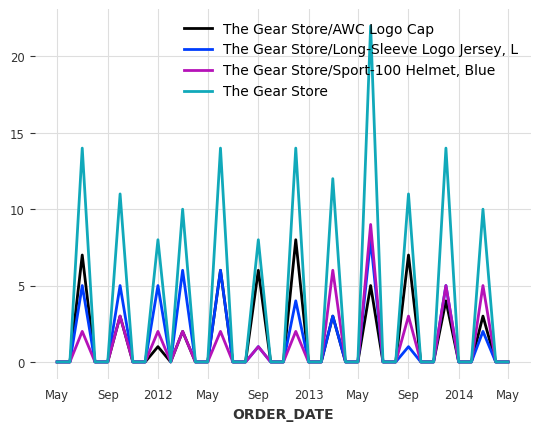

In [29]:
store = 'The Gear Store' # Option 1
# store = 'Fitness Toy Store' # Option 2

# Select some store and all its products
example_columns = [c for c in ts.components if c.startswith(store)]

ts[example_columns].plot()


# Encoding the Hierarchy

The hierarchy needs to be encoded in a way that Darts understands. As such, the hierarchy is represented as a dict, where the keys are component names, and the values are lists containing this component’s parent(s) in the hierarchy.

In [ ]:
hierarchy = {}
for store in stores:
    hierarchy[store] = ['Total']

for store_product in store_products:
    hierarchy[store_product] = [store_product.split('/')[0]]

# hierarchy

In [11]:
# Attach the hierarchy to the timeseries
ts = ts.with_hierarchy(hierarchy)

# Train Test Separation

In [12]:
train, val = ts[:-12], ts[-12:]

# Modeling

In [13]:
model = LinearRegressionModel(lags=12)
model.fit(train)
pred = model.predict(n=len(val))

## Evaluation

In [14]:
def measure_mae(pred):
    def print_mae_on_subset(subset, name):
        mae_val = np.mean(mae([pred[c] for c in subset], [val[c] for c in subset]))
        print(f"mean MAE on {name}: {mae_val:.2f}")

    print_mae_on_subset(["Total"], "total")
    print_mae_on_subset(stores, "Stores")
    print_mae_on_subset(store_products, "Store - Products")


measure_mae(pred)

mean MAE on total: 47.28
mean MAE on Stores: 5.47
mean MAE on Store - Products: 2.02


## Visualizing the Predictions (without coherence)


<Axes: xlabel='ORDER_DATE'>

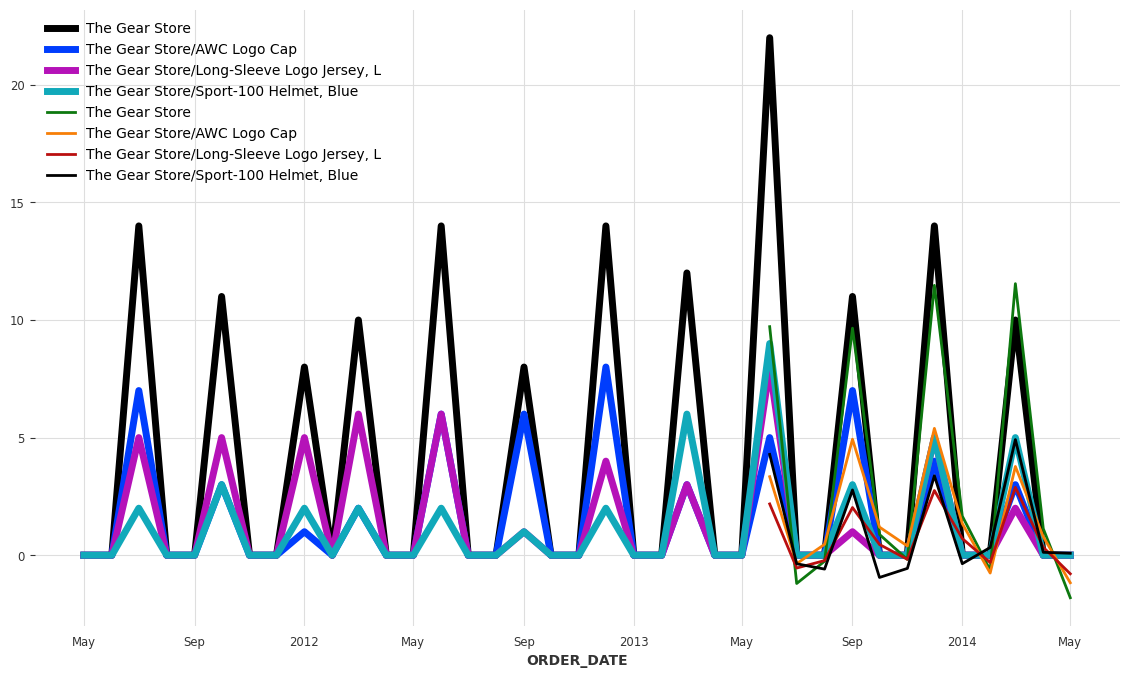

In [15]:
plt.figure(figsize=(14, 8))
ts[example_columns].plot(lw=5)
pred[example_columns].plot(lw=2)

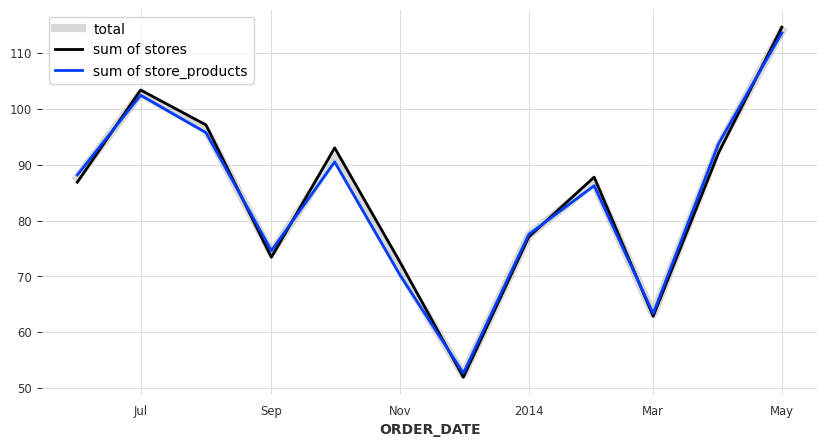

In [16]:
def plot_forecast_sums(pred_series):
    plt.figure(figsize=(10, 5))

    pred_series["Total"].plot(label="total", lw=6, alpha=0.3, color="grey")
    sum([pred_series[r] for r in stores]).plot(label="sum of stores")
    sum([pred_series[r] for r in store_products]).plot(label="sum of store_products")

    legend = plt.legend(loc="best", frameon=1)
    frame = legend.get_frame()
    frame.set_facecolor("white")


plot_forecast_sums(pred)

# Reconciliation

In [17]:
reconciliator = MinTReconciliator(method="wls_val")
reconciliator.fit(train)
reconcilied_preds = reconciliator.transform(pred)

## Evaluation

In [18]:
measure_mae(reconcilied_preds)

mean MAE on total: 47.30
mean MAE on Stores: 5.47
mean MAE on Store - Products: 2.02


## Visualizing the Predictions (with coherence)

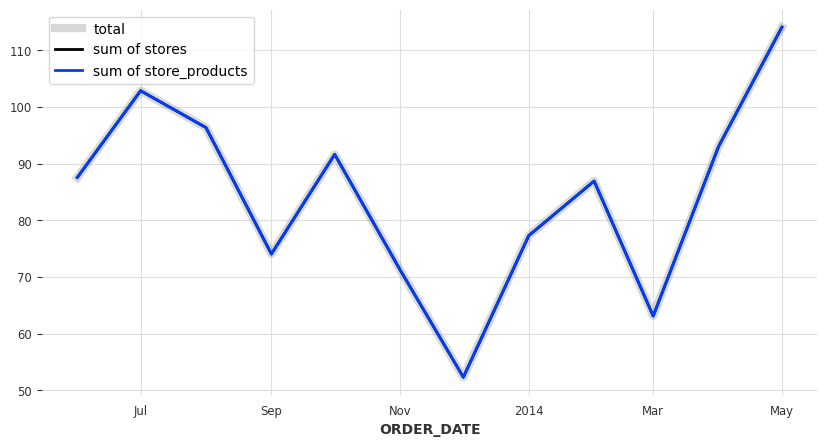

In [19]:
plot_forecast_sums(reconcilied_preds)